In [2]:
import tensorflow as tf

In [4]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "leaf",
    shuffle=True,
    batch_size=32,
    image_size=(224, 224),  # MobileNetV2 requires 224x224 images
)
labels = dataset.class_names


Found 6900 files belonging to 80 classes.


In [6]:
for image_batch, labels_batch in dataset.take(1):
    print(image_batch.shape)  # (batch_size, height, width, channels)
    print(labels_batch.numpy())  # Class labels for the batch
    break


(32, 224, 224, 3)
[74 16 12 22 31 74 14 22 58 46 67  6 52  7 75 13 50 20  1  7 48 22 70 11
 53 15 49 20 57 65 30 39]


In [8]:
def get_dataset_partisions_tf(ds, train_split=0.8, test_split=0.2, shuffle=True, shuffle_size=10000):
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)
    train_size = int(train_split * len(ds))
    test_size = int(test_split * len(ds))
    train_ds = ds.take(train_size)
    test_ds = ds.skip(train_size)
    val_ds = test_ds.skip(test_size)
    test_ds = test_ds.take(test_size)
    return train_ds, test_ds, val_ds

train_ds, test_ds, val_ds = get_dataset_partisions_tf(dataset)


In [10]:
resize_and_rescale = tf.keras.Sequential([
    tf.keras.layers.Resizing(224, 224),  # Resize images to 224x224
    tf.keras.layers.Rescaling(1./255)   # Normalize pixel values to [0, 1]
])


In [12]:
base_model = tf.keras.applications.MobileNetV2(
    weights='imagenet',
    input_shape=(224, 224, 3),
    include_top=False,  # Exclude the top classification layers
    pooling='avg',  # Global average pooling
)
base_model.trainable = False  # Freeze the base model


In [14]:
inputs = tf.keras.Input(shape=(224, 224, 3))
x = resize_and_rescale(inputs)
x = base_model(x, training=False)
x = tf.keras.layers.Dense(128, activation='relu')(x)
x = tf.keras.layers.Dropout(0.3)(x)  # Slightly higher dropout for regularization
outputs = tf.keras.layers.Dense(len(labels), activation='softmax')(x)
model = tf.keras.Model(inputs, outputs)


In [16]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


In [18]:
history = model.fit(
    train_ds,
    validation_data=val_ds,
    batch_size=32,
    epochs=25  # Same number of epochs
)


Epoch 1/25


2024-11-24 23:24:33.283748: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:9: Filling up shuffle buffer (this may take a while): 28 of 10000
2024-11-24 23:24:53.122038: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:9: Filling up shuffle buffer (this may take a while): 80 of 10000
2024-11-24 23:25:03.236767: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:9: Filling up shuffle buffer (this may take a while): 107 of 10000
2024-11-24 23:25:13.374800: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:9: Filling up shuffle buffer (this may take a while): 136 of 10000
Corrupt JPEG data: 445 extraneous bytes before marker 0xd9
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
2024-11-24 23:25:33.100566: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:9: Filling up shuffle buffer (this may take a while): 190 of 1

172/172 ━━━━━━━━━━━━━━━━━━━━ 0s 429ms/step - accuracy: 0.1358 - loss: 3.8582

2024-11-24 23:27:06.562353: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:9: Filling up shuffle buffer (this may take a while): 30 of 10000
2024-11-24 23:27:16.901805: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:9: Filling up shuffle buffer (this may take a while): 60 of 10000
2024-11-24 23:27:36.708404: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:9: Filling up shuffle buffer (this may take a while): 119 of 10000
Corrupt JPEG data: 445 extraneous bytes before marker 0xd9
2024-11-24 23:27:46.900173: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:9: Filling up shuffle buffer (this may take a while): 148 of 10000
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
2024-11-24 23:28:06.821424: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:9: Filling up shuffle buffer (this may take a while): 205 of 1

172/172 ━━━━━━━━━━━━━━━━━━━━ 230s 870ms/step - accuracy: 0.1364 - loss: 3.8548 - val_accuracy: 0.4688 - val_loss: 2.2485
Epoch 2/25


2024-11-24 23:28:21.327165: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:9: Filling up shuffle buffer (this may take a while): 30 of 10000
2024-11-24 23:28:31.440617: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:9: Filling up shuffle buffer (this may take a while): 59 of 10000
2024-11-24 23:28:51.293150: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:9: Filling up shuffle buffer (this may take a while): 117 of 10000
Corrupt JPEG data: 445 extraneous bytes before marker 0xd9
2024-11-24 23:29:01.525151: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:9: Filling up shuffle buffer (this may take a while): 146 of 10000
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
2024-11-24 23:29:21.690121: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:9: Filling up shuffle buffer (this may take a while): 201 of 1

172/172 ━━━━━━━━━━━━━━━━━━━━ 0s 444ms/step - accuracy: 0.5010 - loss: 1.9157

2024-11-24 23:30:53.409130: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:9: Filling up shuffle buffer (this may take a while): 29 of 10000
2024-11-24 23:31:03.459836: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:9: Filling up shuffle buffer (this may take a while): 59 of 10000
2024-11-24 23:31:23.224720: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:9: Filling up shuffle buffer (this may take a while): 115 of 10000
2024-11-24 23:31:33.228119: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:9: Filling up shuffle buffer (this may take a while): 145 of 10000
Corrupt JPEG data: 445 extraneous bytes before marker 0xd9
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
2024-11-24 23:31:53.399557: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:9: Filling up shuffle buffer (this may take a while): 199 of 1

172/172 ━━━━━━━━━━━━━━━━━━━━ 230s 898ms/step - accuracy: 0.5012 - loss: 1.9148 - val_accuracy: 0.8750 - val_loss: 0.8982
Epoch 3/25


2024-11-24 23:32:10.832779: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:9: Filling up shuffle buffer (this may take a while): 29 of 10000
2024-11-24 23:32:20.940732: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:9: Filling up shuffle buffer (this may take a while): 57 of 10000
2024-11-24 23:32:40.962345: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:9: Filling up shuffle buffer (this may take a while): 116 of 10000
Corrupt JPEG data: 445 extraneous bytes before marker 0xd9
2024-11-24 23:32:50.996255: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:9: Filling up shuffle buffer (this may take a while): 146 of 10000
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
2024-11-24 23:33:10.976232: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:9: Filling up shuffle buffer (this may take a while): 201 of 1

172/172 ━━━━━━━━━━━━━━━━━━━━ 0s 436ms/step - accuracy: 0.6616 - loss: 1.2848

2024-11-24 23:34:41.483269: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:9: Filling up shuffle buffer (this may take a while): 30 of 10000
2024-11-24 23:35:01.247531: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:9: Filling up shuffle buffer (this may take a while): 88 of 10000
Corrupt JPEG data: 445 extraneous bytes before marker 0xd9
2024-11-24 23:35:21.077317: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:9: Filling up shuffle buffer (this may take a while): 146 of 10000
Corrupt JPEG data: premature end of data segment
2024-11-24 23:35:31.205946: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:9: Filling up shuffle buffer (this may take a while): 174 of 10000
Corrupt JPEG data: premature end of data segment
2024-11-24 23:35:41.329182: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:9: Filling up shuffle buffer (this may take a while): 202 of 1

172/172 ━━━━━━━━━━━━━━━━━━━━ 226s 878ms/step - accuracy: 0.6617 - loss: 1.2843 - val_accuracy: 0.9062 - val_loss: 0.5748
Epoch 4/25


2024-11-24 23:35:56.904532: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:9: Filling up shuffle buffer (this may take a while): 29 of 10000
2024-11-24 23:36:16.869485: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:9: Filling up shuffle buffer (this may take a while): 87 of 10000
Corrupt JPEG data: 445 extraneous bytes before marker 0xd9
2024-11-24 23:36:37.025885: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:9: Filling up shuffle buffer (this may take a while): 147 of 10000
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
2024-11-24 23:36:56.865699: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:9: Filling up shuffle buffer (this may take a while): 204 of 10000
2024-11-24 23:37:00.932549: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


172/172 ━━━━━━━━━━━━━━━━━━━━ 0s 439ms/step - accuracy: 0.7345 - loss: 0.9665

2024-11-24 23:38:27.045080: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:9: Filling up shuffle buffer (this may take a while): 30 of 10000
2024-11-24 23:38:37.048035: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:9: Filling up shuffle buffer (this may take a while): 55 of 10000
2024-11-24 23:38:56.809485: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:9: Filling up shuffle buffer (this may take a while): 104 of 10000
2024-11-24 23:39:06.856507: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:9: Filling up shuffle buffer (this may take a while): 132 of 10000
Corrupt JPEG data: 445 extraneous bytes before marker 0xd9
Corrupt JPEG data: premature end of data segment
2024-11-24 23:39:16.905206: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:9: Filling up shuffle buffer (this may take a while): 158 of 10000
Corrupt JPEG data: premature end of data seg

172/172 ━━━━━━━━━━━━━━━━━━━━ 235s 934ms/step - accuracy: 0.7345 - loss: 0.9663 - val_accuracy: 0.9375 - val_loss: 0.4439
Epoch 5/25


2024-11-24 23:39:51.590349: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:9: Filling up shuffle buffer (this may take a while): 29 of 10000
2024-11-24 23:40:11.780061: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:9: Filling up shuffle buffer (this may take a while): 86 of 10000
2024-11-24 23:40:31.467536: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:9: Filling up shuffle buffer (this may take a while): 142 of 10000
Corrupt JPEG data: 445 extraneous bytes before marker 0xd9
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
2024-11-24 23:40:51.284709: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:9: Filling up shuffle buffer (this may take a while): 196 of 10000
2024-11-24 23:40:58.294992: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


172/172 ━━━━━━━━━━━━━━━━━━━━ 0s 452ms/step - accuracy: 0.7759 - loss: 0.7822

2024-11-24 23:42:26.440127: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:9: Filling up shuffle buffer (this may take a while): 29 of 10000
2024-11-24 23:42:46.285472: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:9: Filling up shuffle buffer (this may take a while): 86 of 10000
2024-11-24 23:42:56.447971: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:9: Filling up shuffle buffer (this may take a while): 115 of 10000
Corrupt JPEG data: 445 extraneous bytes before marker 0xd9
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
2024-11-24 23:43:16.565190: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:9: Filling up shuffle buffer (this may take a while): 172 of 10000
2024-11-24 23:43:33.138223: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


172/172 ━━━━━━━━━━━━━━━━━━━━ 233s 907ms/step - accuracy: 0.7759 - loss: 0.7821 - val_accuracy: 1.0000 - val_loss: 0.1368
Epoch 6/25


2024-11-24 23:43:44.264702: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:9: Filling up shuffle buffer (this may take a while): 26 of 10000
2024-11-24 23:44:04.384820: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:9: Filling up shuffle buffer (this may take a while): 82 of 10000
2024-11-24 23:44:24.056343: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:9: Filling up shuffle buffer (this may take a while): 139 of 10000
Corrupt JPEG data: 445 extraneous bytes before marker 0xd9
Corrupt JPEG data: premature end of data segment
2024-11-24 23:44:34.332947: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:9: Filling up shuffle buffer (this may take a while): 167 of 10000
Corrupt JPEG data: premature end of data segment
2024-11-24 23:44:52.407154: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


172/172 ━━━━━━━━━━━━━━━━━━━━ 0s 446ms/step - accuracy: 0.8287 - loss: 0.6127

2024-11-24 23:46:19.723889: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:9: Filling up shuffle buffer (this may take a while): 29 of 10000
2024-11-24 23:46:39.539136: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:9: Filling up shuffle buffer (this may take a while): 86 of 10000
2024-11-24 23:46:49.567893: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:9: Filling up shuffle buffer (this may take a while): 116 of 10000
2024-11-24 23:46:59.717025: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:9: Filling up shuffle buffer (this may take a while): 145 of 10000
Corrupt JPEG data: 445 extraneous bytes before marker 0xd9
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
2024-11-24 23:47:19.666165: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:9: Filling up shuffle buffer (this may take a while): 200 of 1

172/172 ━━━━━━━━━━━━━━━━━━━━ 232s 897ms/step - accuracy: 0.8286 - loss: 0.6129 - val_accuracy: 0.9688 - val_loss: 0.1836
Epoch 7/25


2024-11-24 23:47:36.570158: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:9: Filling up shuffle buffer (this may take a while): 29 of 10000
2024-11-24 23:47:56.826199: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:9: Filling up shuffle buffer (this may take a while): 85 of 10000
2024-11-24 23:48:16.865772: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:9: Filling up shuffle buffer (this may take a while): 144 of 10000
Corrupt JPEG data: 445 extraneous bytes before marker 0xd9
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
2024-11-24 23:48:36.519460: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:9: Filling up shuffle buffer (this may take a while): 196 of 10000
2024-11-24 23:48:43.336181: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


172/172 ━━━━━━━━━━━━━━━━━━━━ 0s 452ms/step - accuracy: 0.8611 - loss: 0.5185

2024-11-24 23:50:11.600591: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:9: Filling up shuffle buffer (this may take a while): 29 of 10000
2024-11-24 23:50:31.703754: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:9: Filling up shuffle buffer (this may take a while): 86 of 10000
2024-11-24 23:50:51.641401: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:9: Filling up shuffle buffer (this may take a while): 145 of 10000
Corrupt JPEG data: 445 extraneous bytes before marker 0xd9
Corrupt JPEG data: premature end of data segment
2024-11-24 23:51:01.712909: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:9: Filling up shuffle buffer (this may take a while): 172 of 10000
Corrupt JPEG data: premature end of data segment
2024-11-24 23:51:11.723308: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:9: Filling up shuffle buffer (this may take a while): 199 of 1

172/172 ━━━━━━━━━━━━━━━━━━━━ 232s 901ms/step - accuracy: 0.8610 - loss: 0.5186 - val_accuracy: 0.9688 - val_loss: 0.2070
Epoch 8/25


2024-11-24 23:51:28.420894: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:9: Filling up shuffle buffer (this may take a while): 27 of 10000
2024-11-24 23:51:38.431851: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:9: Filling up shuffle buffer (this may take a while): 55 of 10000
2024-11-24 23:51:58.457065: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:9: Filling up shuffle buffer (this may take a while): 113 of 10000
Corrupt JPEG data: 445 extraneous bytes before marker 0xd9
2024-11-24 23:52:18.483918: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:9: Filling up shuffle buffer (this may take a while): 166 of 10000
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
2024-11-24 23:52:37.362023: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


172/172 ━━━━━━━━━━━━━━━━━━━━ 0s 450ms/step - accuracy: 0.8562 - loss: 0.4990

2024-11-24 23:54:05.171049: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:9: Filling up shuffle buffer (this may take a while): 29 of 10000
2024-11-24 23:54:15.206751: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:9: Filling up shuffle buffer (this may take a while): 58 of 10000
2024-11-24 23:54:25.466581: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:9: Filling up shuffle buffer (this may take a while): 85 of 10000
Corrupt JPEG data: 445 extraneous bytes before marker 0xd9
2024-11-24 23:54:45.395178: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:9: Filling up shuffle buffer (this may take a while): 145 of 10000
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
2024-11-24 23:55:05.461532: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:9: Filling up shuffle buffer (this may take a while): 199 of 10

172/172 ━━━━━━━━━━━━━━━━━━━━ 234s 902ms/step - accuracy: 0.8562 - loss: 0.4990 - val_accuracy: 0.9688 - val_loss: 0.1359
Epoch 9/25


2024-11-24 23:55:22.371329: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:9: Filling up shuffle buffer (this may take a while): 28 of 10000
2024-11-24 23:55:32.562559: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:9: Filling up shuffle buffer (this may take a while): 57 of 10000
2024-11-24 23:55:52.420504: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:9: Filling up shuffle buffer (this may take a while): 113 of 10000
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: 445 extraneous bytes before marker 0xd9
2024-11-24 23:56:12.304334: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:9: Filling up shuffle buffer (this may take a while): 168 of 10000
Corrupt JPEG data: premature end of data segment
2024-11-24 23:56:23.049521: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:9: Filling up shuffle buffer (this may take a while): 196 of 1

172/172 ━━━━━━━━━━━━━━━━━━━━ 0s 452ms/step - accuracy: 0.8767 - loss: 0.4139

2024-11-24 23:57:57.657533: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:9: Filling up shuffle buffer (this may take a while): 28 of 10000
2024-11-24 23:58:07.810276: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:9: Filling up shuffle buffer (this may take a while): 57 of 10000
2024-11-24 23:58:17.885481: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:9: Filling up shuffle buffer (this may take a while): 86 of 10000
Corrupt JPEG data: 445 extraneous bytes before marker 0xd9
2024-11-24 23:58:37.846923: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:9: Filling up shuffle buffer (this may take a while): 142 of 10000
Corrupt JPEG data: premature end of data segment
2024-11-24 23:58:57.783228: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:9: Filling up shuffle buffer (this may take a while): 195 of 10000
Corrupt JPEG data: premature end of data segm

172/172 ━━━━━━━━━━━━━━━━━━━━ 233s 907ms/step - accuracy: 0.8767 - loss: 0.4139 - val_accuracy: 0.9688 - val_loss: 0.1083
Epoch 10/25


2024-11-24 23:59:15.625806: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:9: Filling up shuffle buffer (this may take a while): 28 of 10000
2024-11-24 23:59:35.446134: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:9: Filling up shuffle buffer (this may take a while): 84 of 10000
2024-11-24 23:59:45.457096: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:9: Filling up shuffle buffer (this may take a while): 113 of 10000
2024-11-24 23:59:55.873466: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:9: Filling up shuffle buffer (this may take a while): 142 of 10000
Corrupt JPEG data: 445 extraneous bytes before marker 0xd9
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
2024-11-25 00:00:15.445039: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:9: Filling up shuffle buffer (this may take a while): 192 of 1

172/172 ━━━━━━━━━━━━━━━━━━━━ 0s 450ms/step - accuracy: 0.8992 - loss: 0.3756

2024-11-25 00:01:51.897467: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:9: Filling up shuffle buffer (this may take a while): 28 of 10000
2024-11-25 00:02:01.981976: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:9: Filling up shuffle buffer (this may take a while): 57 of 10000
2024-11-25 00:02:12.187628: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:9: Filling up shuffle buffer (this may take a while): 86 of 10000
Corrupt JPEG data: 445 extraneous bytes before marker 0xd9
2024-11-25 00:02:32.230207: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:9: Filling up shuffle buffer (this may take a while): 144 of 10000
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
2024-11-25 00:02:51.936523: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:9: Filling up shuffle buffer (this may take a while): 197 of 10

172/172 ━━━━━━━━━━━━━━━━━━━━ 234s 901ms/step - accuracy: 0.8991 - loss: 0.3756 - val_accuracy: 1.0000 - val_loss: 0.0887
Epoch 11/25


2024-11-25 00:03:09.445170: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:9: Filling up shuffle buffer (this may take a while): 28 of 10000
2024-11-25 00:03:29.351175: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:9: Filling up shuffle buffer (this may take a while): 83 of 10000
2024-11-25 00:03:49.152322: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:9: Filling up shuffle buffer (this may take a while): 141 of 10000
Corrupt JPEG data: 445 extraneous bytes before marker 0xd9
2024-11-25 00:03:59.182874: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:9: Filling up shuffle buffer (this may take a while): 166 of 10000
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
2024-11-25 00:04:09.222393: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:9: Filling up shuffle buffer (this may take a while): 192 of 1

172/172 ━━━━━━━━━━━━━━━━━━━━ 0s 452ms/step - accuracy: 0.8981 - loss: 0.3502

2024-11-25 00:05:45.582739: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:9: Filling up shuffle buffer (this may take a while): 28 of 10000
2024-11-25 00:05:55.830539: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:9: Filling up shuffle buffer (this may take a while): 57 of 10000
2024-11-25 00:06:05.855427: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:9: Filling up shuffle buffer (this may take a while): 85 of 10000
2024-11-25 00:06:25.789385: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:9: Filling up shuffle buffer (this may take a while): 144 of 10000
Corrupt JPEG data: 445 extraneous bytes before marker 0xd9
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
2024-11-25 00:06:35.878425: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:9: Filling up shuffle buffer (this may take a while): 172 of 10

172/172 ━━━━━━━━━━━━━━━━━━━━ 234s 908ms/step - accuracy: 0.8981 - loss: 0.3501 - val_accuracy: 1.0000 - val_loss: 0.0737
Epoch 12/25


2024-11-25 00:07:03.632496: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:9: Filling up shuffle buffer (this may take a while): 28 of 10000
2024-11-25 00:07:13.660914: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:9: Filling up shuffle buffer (this may take a while): 55 of 10000
2024-11-25 00:07:23.919163: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:9: Filling up shuffle buffer (this may take a while): 84 of 10000
Corrupt JPEG data: 445 extraneous bytes before marker 0xd9
2024-11-25 00:07:43.673781: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:9: Filling up shuffle buffer (this may take a while): 141 of 10000
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
2024-11-25 00:08:03.641200: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:9: Filling up shuffle buffer (this may take a while): 196 of 10

172/172 ━━━━━━━━━━━━━━━━━━━━ 0s 449ms/step - accuracy: 0.9079 - loss: 0.3186

2024-11-25 00:09:38.509675: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:9: Filling up shuffle buffer (this may take a while): 29 of 10000
2024-11-25 00:09:48.946025: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:9: Filling up shuffle buffer (this may take a while): 57 of 10000
2024-11-25 00:10:08.876821: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:9: Filling up shuffle buffer (this may take a while): 114 of 10000
Corrupt JPEG data: 445 extraneous bytes before marker 0xd9
Corrupt JPEG data: premature end of data segment
2024-11-25 00:10:28.812690: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:9: Filling up shuffle buffer (this may take a while): 168 of 10000
Corrupt JPEG data: premature end of data segment
2024-11-25 00:10:47.345994: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


172/172 ━━━━━━━━━━━━━━━━━━━━ 235s 915ms/step - accuracy: 0.9079 - loss: 0.3186 - val_accuracy: 0.9688 - val_loss: 0.1212
Epoch 13/25


2024-11-25 00:10:58.293343: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:9: Filling up shuffle buffer (this may take a while): 25 of 10000
2024-11-25 00:11:08.614840: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:9: Filling up shuffle buffer (this may take a while): 50 of 10000
2024-11-25 00:11:28.367689: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:9: Filling up shuffle buffer (this may take a while): 108 of 10000
Corrupt JPEG data: 445 extraneous bytes before marker 0xd9
Corrupt JPEG data: premature end of data segment
2024-11-25 00:11:48.497113: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:9: Filling up shuffle buffer (this may take a while): 164 of 10000
Corrupt JPEG data: premature end of data segment
2024-11-25 00:12:08.196232: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:9: Filling up shuffle buffer (this may take a while): 210 of 1

172/172 ━━━━━━━━━━━━━━━━━━━━ 0s 457ms/step - accuracy: 0.9171 - loss: 0.2918

2024-11-25 00:13:39.421707: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:9: Filling up shuffle buffer (this may take a while): 29 of 10000
2024-11-25 00:13:59.408157: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:9: Filling up shuffle buffer (this may take a while): 85 of 10000
2024-11-25 00:14:09.444464: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:9: Filling up shuffle buffer (this may take a while): 115 of 10000
Corrupt JPEG data: 445 extraneous bytes before marker 0xd9
Corrupt JPEG data: premature end of data segment
2024-11-25 00:14:29.228725: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:9: Filling up shuffle buffer (this may take a while): 171 of 10000
Corrupt JPEG data: premature end of data segment
2024-11-25 00:14:39.289608: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:9: Filling up shuffle buffer (this may take a while): 198 of 1

172/172 ━━━━━━━━━━━━━━━━━━━━ 238s 907ms/step - accuracy: 0.9171 - loss: 0.2918 - val_accuracy: 1.0000 - val_loss: 0.0517
Epoch 14/25


2024-11-25 00:14:56.227228: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:9: Filling up shuffle buffer (this may take a while): 27 of 10000
2024-11-25 00:15:06.315883: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:9: Filling up shuffle buffer (this may take a while): 57 of 10000
2024-11-25 00:15:16.328588: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:9: Filling up shuffle buffer (this may take a while): 84 of 10000
2024-11-25 00:15:26.400192: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:9: Filling up shuffle buffer (this may take a while): 113 of 10000
2024-11-25 00:15:36.544841: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:9: Filling up shuffle buffer (this may take a while): 143 of 10000
Corrupt JPEG data: 445 extraneous bytes before marker 0xd9
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segm

172/172 ━━━━━━━━━━━━━━━━━━━━ 0s 459ms/step - accuracy: 0.9245 - loss: 0.2545

2024-11-25 00:17:32.241774: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:9: Filling up shuffle buffer (this may take a while): 29 of 10000
2024-11-25 00:17:42.381958: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:9: Filling up shuffle buffer (this may take a while): 57 of 10000
2024-11-25 00:18:02.482884: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:9: Filling up shuffle buffer (this may take a while): 114 of 10000
Corrupt JPEG data: 445 extraneous bytes before marker 0xd9
2024-11-25 00:18:22.289724: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:9: Filling up shuffle buffer (this may take a while): 170 of 10000
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
2024-11-25 00:18:39.093927: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


172/172 ━━━━━━━━━━━━━━━━━━━━ 234s 913ms/step - accuracy: 0.9245 - loss: 0.2546 - val_accuracy: 0.9688 - val_loss: 0.1087
Epoch 15/25


2024-11-25 00:18:49.837260: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:9: Filling up shuffle buffer (this may take a while): 29 of 10000
2024-11-25 00:18:59.848397: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:9: Filling up shuffle buffer (this may take a while): 57 of 10000
2024-11-25 00:19:10.211704: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:9: Filling up shuffle buffer (this may take a while): 86 of 10000
2024-11-25 00:19:20.214929: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:9: Filling up shuffle buffer (this may take a while): 115 of 10000
Corrupt JPEG data: 445 extraneous bytes before marker 0xd9
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
2024-11-25 00:19:39.830441: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:9: Filling up shuffle buffer (this may take a while): 171 of 10

172/172 ━━━━━━━━━━━━━━━━━━━━ 0s 446ms/step - accuracy: 0.9363 - loss: 0.2299

2024-11-25 00:21:23.526032: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:9: Filling up shuffle buffer (this may take a while): 28 of 10000
2024-11-25 00:21:33.566972: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:9: Filling up shuffle buffer (this may take a while): 57 of 10000
2024-11-25 00:21:43.593360: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:9: Filling up shuffle buffer (this may take a while): 85 of 10000
Corrupt JPEG data: 445 extraneous bytes before marker 0xd9
2024-11-25 00:22:03.672986: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:9: Filling up shuffle buffer (this may take a while): 141 of 10000
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
2024-11-25 00:22:23.474972: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:9: Filling up shuffle buffer (this may take a while): 193 of 10

172/172 ━━━━━━━━━━━━━━━━━━━━ 232s 903ms/step - accuracy: 0.9362 - loss: 0.2300 - val_accuracy: 1.0000 - val_loss: 0.0491
Epoch 16/25


2024-11-25 00:22:42.059912: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:9: Filling up shuffle buffer (this may take a while): 29 of 10000
2024-11-25 00:23:01.682894: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:9: Filling up shuffle buffer (this may take a while): 87 of 10000
2024-11-25 00:23:11.883702: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:9: Filling up shuffle buffer (this may take a while): 116 of 10000
Corrupt JPEG data: premature end of data segment
2024-11-25 00:23:31.600854: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:9: Filling up shuffle buffer (this may take a while): 171 of 10000
Corrupt JPEG data: 445 extraneous bytes before marker 0xd9
Corrupt JPEG data: premature end of data segment
2024-11-25 00:23:47.436502: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


172/172 ━━━━━━━━━━━━━━━━━━━━ 0s 451ms/step - accuracy: 0.9332 - loss: 0.2273

2024-11-25 00:25:15.403291: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:9: Filling up shuffle buffer (this may take a while): 29 of 10000
2024-11-25 00:25:35.089900: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:9: Filling up shuffle buffer (this may take a while): 81 of 10000
2024-11-25 00:25:45.376755: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:9: Filling up shuffle buffer (this may take a while): 109 of 10000
Corrupt JPEG data: 445 extraneous bytes before marker 0xd9
Corrupt JPEG data: premature end of data segment
2024-11-25 00:26:05.264240: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:9: Filling up shuffle buffer (this may take a while): 161 of 10000
Corrupt JPEG data: premature end of data segment
2024-11-25 00:26:25.287703: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:9: Filling up shuffle buffer (this may take a while): 213 of 1

172/172 ━━━━━━━━━━━━━━━━━━━━ 235s 929ms/step - accuracy: 0.9332 - loss: 0.2274 - val_accuracy: 0.9688 - val_loss: 0.0913
Epoch 17/25


2024-11-25 00:26:37.177370: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:9: Filling up shuffle buffer (this may take a while): 27 of 10000
2024-11-25 00:26:47.526555: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:9: Filling up shuffle buffer (this may take a while): 53 of 10000
2024-11-25 00:27:07.331219: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:9: Filling up shuffle buffer (this may take a while): 104 of 10000
Corrupt JPEG data: 445 extraneous bytes before marker 0xd9
2024-11-25 00:27:27.354542: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:9: Filling up shuffle buffer (this may take a while): 155 of 10000
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
2024-11-25 00:27:37.588183: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:9: Filling up shuffle buffer (this may take a while): 179 of 1

172/172 ━━━━━━━━━━━━━━━━━━━━ 0s 513ms/step - accuracy: 0.9399 - loss: 0.1966

2024-11-25 00:29:37.536176: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:9: Filling up shuffle buffer (this may take a while): 27 of 10000
2024-11-25 00:29:47.571240: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:9: Filling up shuffle buffer (this may take a while): 55 of 10000
2024-11-25 00:30:07.514795: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:9: Filling up shuffle buffer (this may take a while): 109 of 10000
Corrupt JPEG data: 445 extraneous bytes before marker 0xd9
Corrupt JPEG data: premature end of data segment
2024-11-25 00:30:27.523116: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:9: Filling up shuffle buffer (this may take a while): 160 of 10000
Corrupt JPEG data: premature end of data segment
2024-11-25 00:30:37.657247: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:9: Filling up shuffle buffer (this may take a while): 187 of 1

172/172 ━━━━━━━━━━━━━━━━━━━━ 262s 990ms/step - accuracy: 0.9399 - loss: 0.1967 - val_accuracy: 1.0000 - val_loss: 0.0314
Epoch 18/25


2024-11-25 00:30:58.941613: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:9: Filling up shuffle buffer (this may take a while): 27 of 10000
2024-11-25 00:31:19.151843: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:9: Filling up shuffle buffer (this may take a while): 84 of 10000
2024-11-25 00:31:38.816930: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:9: Filling up shuffle buffer (this may take a while): 141 of 10000
Corrupt JPEG data: 445 extraneous bytes before marker 0xd9
Corrupt JPEG data: premature end of data segment
2024-11-25 00:31:48.916596: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:9: Filling up shuffle buffer (this may take a while): 168 of 10000
Corrupt JPEG data: premature end of data segment
2024-11-25 00:31:59.138954: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:9: Filling up shuffle buffer (this may take a while): 193 of 1

172/172 ━━━━━━━━━━━━━━━━━━━━ 0s 447ms/step - accuracy: 0.9423 - loss: 0.1942

2024-11-25 00:33:34.201301: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:9: Filling up shuffle buffer (this may take a while): 29 of 10000
2024-11-25 00:33:54.095567: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:9: Filling up shuffle buffer (this may take a while): 83 of 10000
2024-11-25 00:34:14.216973: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:9: Filling up shuffle buffer (this may take a while): 141 of 10000
Corrupt JPEG data: premature end of data segment
2024-11-25 00:34:24.263354: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:9: Filling up shuffle buffer (this may take a while): 167 of 10000
Corrupt JPEG data: 445 extraneous bytes before marker 0xd9
Corrupt JPEG data: premature end of data segment
2024-11-25 00:34:43.992962: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:9: Filling up shuffle buffer (this may take a while): 214 of 1

172/172 ━━━━━━━━━━━━━━━━━━━━ 237s 926ms/step - accuracy: 0.9423 - loss: 0.1942 - val_accuracy: 1.0000 - val_loss: 0.0396
Epoch 19/25


2024-11-25 00:34:55.818364: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:9: Filling up shuffle buffer (this may take a while): 27 of 10000
2024-11-25 00:35:06.141356: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:9: Filling up shuffle buffer (this may take a while): 52 of 10000
2024-11-25 00:35:16.184903: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:9: Filling up shuffle buffer (this may take a while): 76 of 10000
2024-11-25 00:35:35.844063: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:9: Filling up shuffle buffer (this may take a while): 126 of 10000
Corrupt JPEG data: 445 extraneous bytes before marker 0xd9
Corrupt JPEG data: premature end of data segment
2024-11-25 00:35:55.881242: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:9: Filling up shuffle buffer (this may take a while): 172 of 10000
Corrupt JPEG data: premature end of data segm

172/172 ━━━━━━━━━━━━━━━━━━━━ 0s 583ms/step - accuracy: 0.9532 - loss: 0.1678

2024-11-25 00:38:05.105157: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:9: Filling up shuffle buffer (this may take a while): 25 of 10000
2024-11-25 00:38:25.045503: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:9: Filling up shuffle buffer (this may take a while): 76 of 10000
2024-11-25 00:38:35.528114: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:9: Filling up shuffle buffer (this may take a while): 101 of 10000
2024-11-25 00:38:55.079752: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:9: Filling up shuffle buffer (this may take a while): 144 of 10000
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: 445 extraneous bytes before marker 0xd9
2024-11-25 00:39:05.401749: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:9: Filling up shuffle buffer (this may take a while): 168 of 10000
Corrupt JPEG data: premature end of data seg

172/172 ━━━━━━━━━━━━━━━━━━━━ 281s 1s/step - accuracy: 0.9532 - loss: 0.1678 - val_accuracy: 1.0000 - val_loss: 0.0204
Epoch 20/25


2024-11-25 00:39:37.193045: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:9: Filling up shuffle buffer (this may take a while): 27 of 10000
2024-11-25 00:39:47.454584: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:9: Filling up shuffle buffer (this may take a while): 54 of 10000
2024-11-25 00:40:07.126901: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:9: Filling up shuffle buffer (this may take a while): 108 of 10000
2024-11-25 00:40:17.379846: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:9: Filling up shuffle buffer (this may take a while): 136 of 10000
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: 445 extraneous bytes before marker 0xd9
Corrupt JPEG data: premature end of data segment
2024-11-25 00:40:37.633437: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:9: Filling up shuffle buffer (this may take a while): 188 of 1

172/172 ━━━━━━━━━━━━━━━━━━━━ 0s 489ms/step - accuracy: 0.9605 - loss: 0.1401

2024-11-25 00:42:22.315992: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:9: Filling up shuffle buffer (this may take a while): 28 of 10000
2024-11-25 00:42:32.580734: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:9: Filling up shuffle buffer (this may take a while): 55 of 10000
2024-11-25 00:42:52.701120: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:9: Filling up shuffle buffer (this may take a while): 109 of 10000
Corrupt JPEG data: 445 extraneous bytes before marker 0xd9
Corrupt JPEG data: premature end of data segment
2024-11-25 00:43:12.301146: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:9: Filling up shuffle buffer (this may take a while): 158 of 10000
2024-11-25 00:43:22.298345: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:9: Filling up shuffle buffer (this may take a while): 185 of 10000
Corrupt JPEG data: premature end of data seg

172/172 ━━━━━━━━━━━━━━━━━━━━ 247s 967ms/step - accuracy: 0.9605 - loss: 0.1401 - val_accuracy: 1.0000 - val_loss: 0.0123
Epoch 21/25


2024-11-25 00:43:44.026564: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:9: Filling up shuffle buffer (this may take a while): 28 of 10000
2024-11-25 00:43:54.212892: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:9: Filling up shuffle buffer (this may take a while): 57 of 10000
2024-11-25 00:44:13.971923: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:9: Filling up shuffle buffer (this may take a while): 113 of 10000
2024-11-25 00:44:24.028813: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:9: Filling up shuffle buffer (this may take a while): 142 of 10000
Corrupt JPEG data: 445 extraneous bytes before marker 0xd9
2024-11-25 00:44:34.102826: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:9: Filling up shuffle buffer (this may take a while): 169 of 10000
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data seg

172/172 ━━━━━━━━━━━━━━━━━━━━ 0s 454ms/step - accuracy: 0.9577 - loss: 0.1633

2024-11-25 00:46:20.357186: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:9: Filling up shuffle buffer (this may take a while): 29 of 10000
2024-11-25 00:46:40.207939: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:9: Filling up shuffle buffer (this may take a while): 85 of 10000
2024-11-25 00:46:50.281198: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:9: Filling up shuffle buffer (this may take a while): 116 of 10000
Corrupt JPEG data: 445 extraneous bytes before marker 0xd9
2024-11-25 00:47:00.398029: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:9: Filling up shuffle buffer (this may take a while): 145 of 10000
Corrupt JPEG data: premature end of data segment
2024-11-25 00:47:10.550295: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:9: Filling up shuffle buffer (this may take a while): 170 of 10000
Corrupt JPEG data: premature end of data seg

172/172 ━━━━━━━━━━━━━━━━━━━━ 233s 906ms/step - accuracy: 0.9577 - loss: 0.1633 - val_accuracy: 1.0000 - val_loss: 0.0270
Epoch 22/25


2024-11-25 00:47:37.437148: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:9: Filling up shuffle buffer (this may take a while): 28 of 10000
2024-11-25 00:47:47.526813: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:9: Filling up shuffle buffer (this may take a while): 57 of 10000
2024-11-25 00:48:07.466396: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:9: Filling up shuffle buffer (this may take a while): 114 of 10000
Corrupt JPEG data: 445 extraneous bytes before marker 0xd9
2024-11-25 00:48:17.575718: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:9: Filling up shuffle buffer (this may take a while): 144 of 10000
Corrupt JPEG data: premature end of data segment
2024-11-25 00:48:27.844165: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:9: Filling up shuffle buffer (this may take a while): 170 of 10000
Corrupt JPEG data: premature end of data seg

172/172 ━━━━━━━━━━━━━━━━━━━━ 0s 452ms/step - accuracy: 0.9533 - loss: 0.1534

2024-11-25 00:50:12.314713: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:9: Filling up shuffle buffer (this may take a while): 29 of 10000
2024-11-25 00:50:32.331413: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:9: Filling up shuffle buffer (this may take a while): 86 of 10000
2024-11-25 00:50:42.345620: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:9: Filling up shuffle buffer (this may take a while): 116 of 10000
Corrupt JPEG data: 445 extraneous bytes before marker 0xd9
2024-11-25 00:50:52.496428: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:9: Filling up shuffle buffer (this may take a while): 145 of 10000
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
2024-11-25 00:51:12.228780: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:9: Filling up shuffle buffer (this may take a while): 197 of 1

172/172 ━━━━━━━━━━━━━━━━━━━━ 232s 903ms/step - accuracy: 0.9533 - loss: 0.1535 - val_accuracy: 1.0000 - val_loss: 0.0108
Epoch 23/25


2024-11-25 00:51:29.278309: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:9: Filling up shuffle buffer (this may take a while): 28 of 10000
2024-11-25 00:51:39.306103: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:9: Filling up shuffle buffer (this may take a while): 56 of 10000
2024-11-25 00:51:59.320164: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:9: Filling up shuffle buffer (this may take a while): 115 of 10000
Corrupt JPEG data: 445 extraneous bytes before marker 0xd9
2024-11-25 00:52:09.340779: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:9: Filling up shuffle buffer (this may take a while): 145 of 10000
Corrupt JPEG data: premature end of data segment
2024-11-25 00:52:19.472940: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:9: Filling up shuffle buffer (this may take a while): 171 of 10000
Corrupt JPEG data: premature end of data seg

172/172 ━━━━━━━━━━━━━━━━━━━━ 0s 450ms/step - accuracy: 0.9577 - loss: 0.1433

2024-11-25 00:54:03.171271: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:9: Filling up shuffle buffer (this may take a while): 30 of 10000
2024-11-25 00:54:13.223614: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:9: Filling up shuffle buffer (this may take a while): 58 of 10000
2024-11-25 00:54:23.292157: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:9: Filling up shuffle buffer (this may take a while): 85 of 10000
2024-11-25 00:54:43.193960: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:9: Filling up shuffle buffer (this may take a while): 142 of 10000
Corrupt JPEG data: 445 extraneous bytes before marker 0xd9
2024-11-25 00:54:53.212003: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:9: Filling up shuffle buffer (this may take a while): 169 of 10000
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segm

172/172 ━━━━━━━━━━━━━━━━━━━━ 232s 905ms/step - accuracy: 0.9577 - loss: 0.1433 - val_accuracy: 1.0000 - val_loss: 0.0174
Epoch 24/25


2024-11-25 00:55:21.165146: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:9: Filling up shuffle buffer (this may take a while): 29 of 10000
2024-11-25 00:55:41.273255: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:9: Filling up shuffle buffer (this may take a while): 86 of 10000
Corrupt JPEG data: 445 extraneous bytes before marker 0xd9
2024-11-25 00:56:00.937296: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:9: Filling up shuffle buffer (this may take a while): 143 of 10000
Corrupt JPEG data: premature end of data segment
2024-11-25 00:56:11.134746: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:9: Filling up shuffle buffer (this may take a while): 170 of 10000
Corrupt JPEG data: premature end of data segment
2024-11-25 00:56:27.508215: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


172/172 ━━━━━━━━━━━━━━━━━━━━ 0s 444ms/step - accuracy: 0.9598 - loss: 0.1356

2024-11-25 00:57:54.492024: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:9: Filling up shuffle buffer (this may take a while): 29 of 10000
2024-11-25 00:58:14.387344: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:9: Filling up shuffle buffer (this may take a while): 84 of 10000
2024-11-25 00:58:34.542693: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:9: Filling up shuffle buffer (this may take a while): 144 of 10000
Corrupt JPEG data: 445 extraneous bytes before marker 0xd9
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
2024-11-25 00:58:54.271783: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:9: Filling up shuffle buffer (this may take a while): 195 of 10000
2024-11-25 00:59:01.238878: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


172/172 ━━━━━━━━━━━━━━━━━━━━ 231s 901ms/step - accuracy: 0.9598 - loss: 0.1356 - val_accuracy: 1.0000 - val_loss: 0.0266
Epoch 25/25


2024-11-25 00:59:12.503601: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:9: Filling up shuffle buffer (this may take a while): 28 of 10000
2024-11-25 00:59:32.221381: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:9: Filling up shuffle buffer (this may take a while): 84 of 10000
2024-11-25 00:59:42.297914: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:9: Filling up shuffle buffer (this may take a while): 112 of 10000
2024-11-25 00:59:52.406370: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:9: Filling up shuffle buffer (this may take a while): 140 of 10000
Corrupt JPEG data: 445 extraneous bytes before marker 0xd9
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
2024-11-25 01:00:12.596805: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:9: Filling up shuffle buffer (this may take a while): 194 of 1

172/172 ━━━━━━━━━━━━━━━━━━━━ 0s 451ms/step - accuracy: 0.9609 - loss: 0.1295

2024-11-25 01:01:49.362714: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:9: Filling up shuffle buffer (this may take a while): 29 of 10000
2024-11-25 01:02:09.359864: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:9: Filling up shuffle buffer (this may take a while): 85 of 10000
2024-11-25 01:02:29.102788: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:9: Filling up shuffle buffer (this may take a while): 142 of 10000
Corrupt JPEG data: 445 extraneous bytes before marker 0xd9
Corrupt JPEG data: premature end of data segment
2024-11-25 01:02:39.220755: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:9: Filling up shuffle buffer (this may take a while): 168 of 10000
Corrupt JPEG data: premature end of data segment
2024-11-25 01:02:49.389419: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:9: Filling up shuffle buffer (this may take a while): 196 of 1

172/172 ━━━━━━━━━━━━━━━━━━━━ 235s 908ms/step - accuracy: 0.9609 - loss: 0.1295 - val_accuracy: 1.0000 - val_loss: 0.0075


In [22]:
import numpy as np

In [24]:
img = tf.keras.preprocessing.image.load_img(
    'tulsi.jpg', target_size=(224, 224)  # Target size matches the model input
)
img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)
predictions = model.predict(img_array)
score = tf.nn.sigmoid(predictions[0])
print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(labels[np.argmax(score)], 100 * np.max(score))
)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
This image most likely belongs to Tulsi with a 73.06 percent confidence.


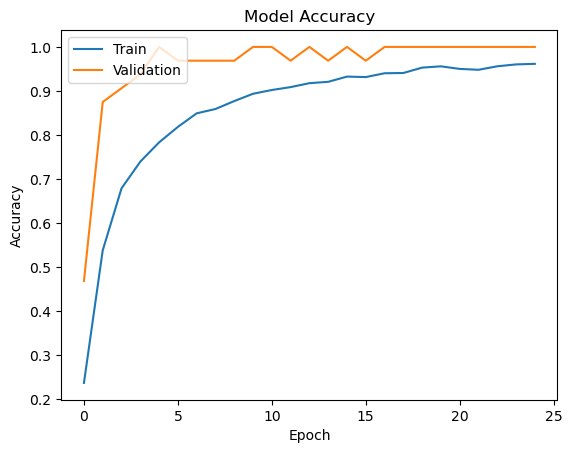

In [26]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


In [32]:
model.save('model2.h5')

In [30]:
model.save('model2.keras')